<a href="https://colab.research.google.com/github/Ashutosh-Jaiswal06/Pytorch_tutorials/blob/main/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torch

#creating a neural network to classify images

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [35]:
# create a model class that inherit .nn module
class Model(nn.Module):
  # 4input features
  # 2 hidden layers
  # 3 outputs

  def __init__(self,inp_feat =4, h1 =6, h2 =6, out_feat = 3):
    super().__init__()

    self.fc1 = nn.Linear(inp_feat,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_feat)

  def Forward_Pass(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x


In [60]:
#Pick a model seed for randomization
torch.manual_seed(11)
#Create an instance of the class Model

model = Model()

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [62]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

In [63]:
df = pd.read_csv(url)

In [64]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [66]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [67]:
df['species'] =df['species'].replace('setosa', 0.0)
df['species'] =df['species'].replace('virginica', 1.0)
df['species'] =df['species'].replace('versicolor', 2.0)

/tmp/ipython-input-167303962.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] =df['species'].replace('versicolor', 2.0)


In [68]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1.0
146,6.3,2.5,5.0,1.9,1.0
147,6.5,3.0,5.2,2.0,1.0
148,6.2,3.4,5.4,2.3,1.0


In [69]:
#Set X and y
X = df.drop('species', axis =1)
y = df["species"]

In [70]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
y

,species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,1.0
146,1.0
147,1.0
148,1.0


In [72]:
X = X.values
y = y.values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 11)

In [74]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [76]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [77]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [78]:
# Define Loss Function (Cross Entropy Loss for multi-class classification)
criterion = nn.CrossEntropyLoss()

In [79]:
# Define Optimizer (Adam optimizer)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [54]:
#train the model

In [85]:
epochs =1000
losses =[]

for i in range(epochs):
  y_pred = model.Forward_Pass(X_train)
  loss = loss_func(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 Loss: 0.03167852386832237
Epoch: 10 Loss: 0.030003463849425316
Epoch: 20 Loss: 0.028425658121705055
Epoch: 30 Loss: 0.02693912200629711
Epoch: 40 Loss: 0.02555587887763977
Epoch: 50 Loss: 0.02424878068268299
Epoch: 60 Loss: 0.02303391322493553
Epoch: 70 Loss: 0.02187992073595524
Epoch: 80 Loss: 0.020807040855288506
Epoch: 90 Loss: 0.019796274602413177
Epoch: 100 Loss: 0.01885845698416233
Epoch: 110 Loss: 0.017966171726584435
Epoch: 120 Loss: 0.017136523500084877
Epoch: 130 Loss: 0.016347913071513176
Epoch: 140 Loss: 0.015613063238561153
Epoch: 150 Loss: 0.014921065419912338
Epoch: 160 Loss: 0.014280724339187145
Epoch: 170 Loss: 0.013669678010046482
Epoch: 180 Loss: 0.013104929588735104
Epoch: 190 Loss: 0.012560201808810234
Epoch: 200 Loss: 0.012060444802045822
Epoch: 210 Loss: 0.011581461876630783
Epoch: 220 Loss: 0.01113059651106596
Epoch: 230 Loss: 0.0107096116989851
Epoch: 240 Loss: 0.010310717858374119
Epoch: 250 Loss: 0.009937033988535404
Epoch: 260 Loss: 0.00958048924803

In [86]:
import matplotlib.pyplot as plt



Text(0, 0.5, 'Loss')

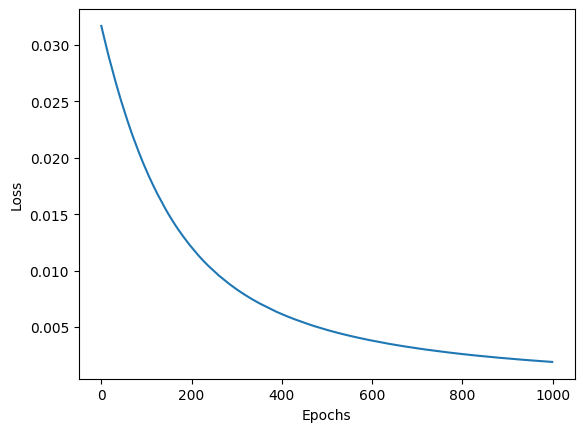

In [87]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')